# Confidence Internal

In [12]:
from numpy.random import uniform

In [13]:
import numpy

In [14]:
# choose 30 unifromly from 0 to 100
x = uniform(0, 100, 30)

In [15]:
numpy.mean(x)

50.768441736469725

In [16]:
ms =[]
for _ in range(50):
    x = uniform(0, 100, 30)
    m = numpy.mean(x)
    ms.append(m)
    print(m)

46.250364188143884
48.05512494752288
47.533684683976574
46.82292527384064
55.473287905299735
52.506985094802985
57.075309488854174
47.386608452056265
54.56033558952026
45.32918728045579
47.36175531497508
42.72626704044769
35.79600135040422
49.945073780019335
38.72221046115137
53.869657541764376
41.46801770773881
52.566607123889476
53.96987293454628
61.03007190476547
48.36374369380965
52.21553290586514
41.87609948354444
38.49856290445378
48.46718762594335
48.3108085081803
61.23417900059834
46.64212201028453
38.91598585780741
41.19616975756898
63.29568795143771
50.13644803129171
44.15575202742424
56.874303540358234
43.391399925041014
45.64007713433758
54.92725762199214
59.477438103635244
47.49501092547201
52.18352547824928
49.129711134749776
50.23419364708507
57.458945841450586
49.76609628780556
36.617495776252035
53.5674270791184
50.8790076614336
50.37784508765427
51.575290468559395
52.8776055407721


In [17]:
import seaborn

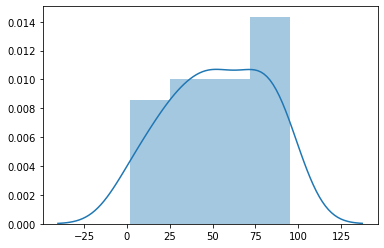

In [18]:
# 하나의 샘플에서 데이터는 어떻게 퍼져 있는가?
seaborn.distplot(x)

## Sampling Distribution

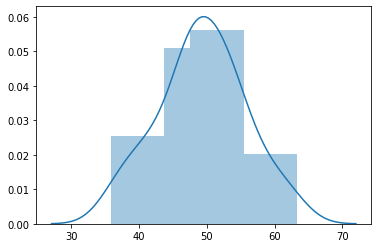

In [19]:
# 샘플링 할때 마다 평균이 어떻게 달라지는가?
seaborn.distplot(ms)

In [22]:
import sklearn

## 99% 신뢰구간

In [23]:
numpy.quantile(ms, 0.005)

35.99726748473694

In [24]:
numpy.quantile(ms, .995)

62.79061825848207

In [30]:
import pandas as pd

In [31]:
cars = pd.read_csv('./cars.csv')

In [25]:
from sklearn.utils import resample

In [26]:
resample([3,4,5])

[5, 4, 5]

In [32]:
ms = []
for _ in range(100000):
    x = resample(cars['speed'])
    m = numpy.mean(x)
    ms.append(m)

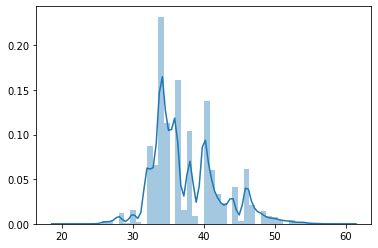

In [46]:
seaborn.distplot(ms)

## Exercise
cars의 dist 컬럼의 중간값(median)을 구하고, 그 95% 신뢰구간을 구해 보세요.

In [36]:
numpy.median(cars['dist'])

36.0

In [41]:
ms=[]
for _ in range(100000):
    x = resample(cars['dist'])
    m = numpy.median(x)
    ms.append(m)

In [42]:
numpy.quantile(ms, 0.025)

30.0

In [66]:
numpy.quantile(ms, 0.975)

48.0

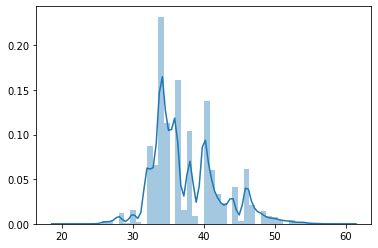

In [67]:
seaborn.distplot(ms)

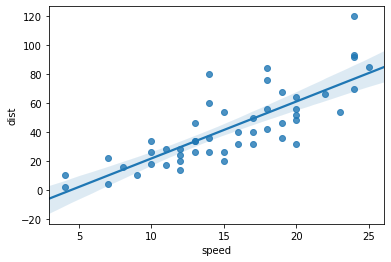

In [47]:
seaborn.regplot('speed', 'dist', cars)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# 선형모델
model = LinearRegression()

In [53]:
# 독립변수
x = cars[['speed']]

# 종속변수
y = cars['dist']

#파라미터 추정
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#계수(coefficient) - 독립변수의 가중치 (ax + b 에서 a 에 해당)
model.coef_

array([3.93240876])

In [55]:
#절편(intercept) - (ax + b 에서 b 에 해당)
model.intercept_

-17.579094890510973

## Exercise
부트스트래핑으로 선형 모형의 파라미터의 95% 신뢰구간 구하기

In [56]:
resample(cars)

,Unnamed: 0,speed,dist
37,38,19,68
10,11,11,28
47,48,24,93
11,12,12,14
28,29,17,32
15,16,13,26
7,8,10,26
16,17,13,34
24,25,15,26
29,30,17,40


In [59]:
coefs=[]
intercepts=[]

for _ in range(10000):
    df = resample(cars)    #샘플링
    
    x = df[['speed']]      #독립변수
    y = df['dist']         #종속변수
    
    model = LinearRegression()   #모형 만들기
    model.fit(x,y)               #파라미터 추정
    
    coefs.append(model.coef_)                  #추정한 계수를 리스트에 추가
    intercepts.append(model.intercept_)        #추정한 절편을 리스트에 추가

In [60]:
numpy.quantile(coefs, 0.025)

3.1459715119068443

In [64]:
numpy.quantile(coefs, 0.975)

4.752722666361678

In [62]:
numpy.quantile(intercepts, 0.025)

-29.76958992989416

In [65]:
numpy.quantile(intercepts, 0.975)

-6.8600423012173275

## Exercise
sleep 데이터를 열어서 group으로 extra를 예측하는 선형 모형을 만들고 각 파라미터의 신뢰구간을 구해 보시오.

In [68]:
sleep = pd.read_csv('./sleep.csv')

In [70]:
sleep_model = LinearRegression()

In [71]:
sleep_x = sleep[['group']]

In [72]:
sleep_y = sleep['extra']

In [73]:
sleep_model.fit(sleep_x, sleep_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
sleep_model.coef_

array([1.58])

In [75]:
sleep_model.intercept_

-0.8299999999999994

In [77]:
coefs = []

for _ in range(10000):
    df = resample(sleep)
    
    x = df[['group']]
    y = df['extra']
    
    model = LinearRegression()
    model.fit(x,y)
    
    coefs.append(model.coef_)

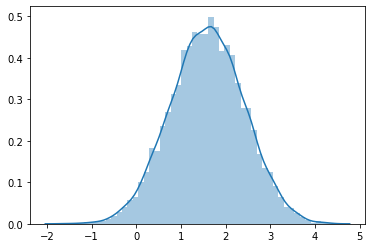

In [78]:
seaborn.distplot(coefs)